IMPORTATION DES PACKAGES 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

CHARGEMENT DES DONNEES

In [34]:
data= pd.read_csv('Mall_Customers.csv')
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


ANALYSE DES DONNEES

In [35]:
data.shape
data.tail(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [38]:
data['Genre'].unique()

array(['Male', 'Female'], dtype=object)

TRAITEMENT DES DONNEES

In [39]:
#LABEL ENCODING
labeling_IP_dst=LabelEncoder()
data['Genre']=labeling_IP_dst.fit_transform(data['Genre'])

In [40]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [41]:
data['Genre'].unique()

array([1, 0])

MATRICE DE CORELATION 

<Axes: >

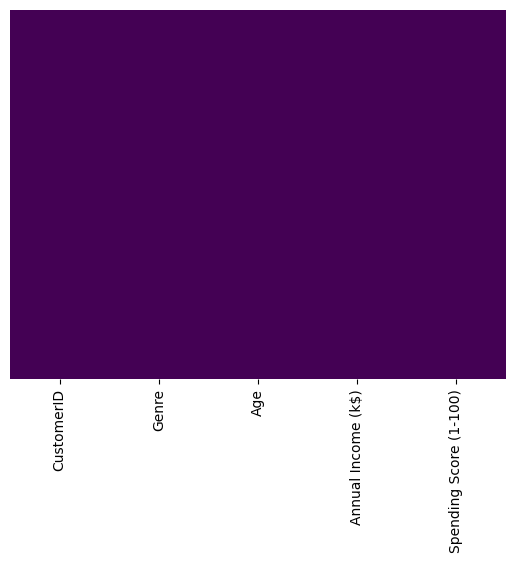

In [42]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

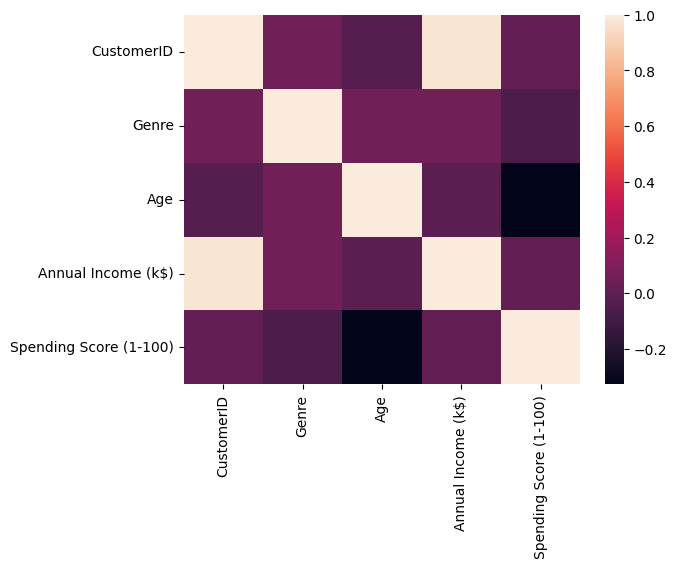

In [43]:
sns.heatmap(data.corr(), annot =False)

SEPARATION DES DONNEES

In [44]:
#variable independante
X = data.iloc[ : , :-1].values

In [45]:
X 

array([[  1,   1,  19,  15],
       [  2,   1,  21,  15],
       [  3,   0,  20,  16],
       [  4,   0,  23,  16],
       [  5,   0,  31,  17],
       [  6,   0,  22,  17],
       [  7,   0,  35,  18],
       [  8,   0,  23,  18],
       [  9,   1,  64,  19],
       [ 10,   0,  30,  19],
       [ 11,   1,  67,  19],
       [ 12,   0,  35,  19],
       [ 13,   0,  58,  20],
       [ 14,   0,  24,  20],
       [ 15,   1,  37,  20],
       [ 16,   1,  22,  20],
       [ 17,   0,  35,  21],
       [ 18,   1,  20,  21],
       [ 19,   1,  52,  23],
       [ 20,   0,  35,  23],
       [ 21,   1,  35,  24],
       [ 22,   1,  25,  24],
       [ 23,   0,  46,  25],
       [ 24,   1,  31,  25],
       [ 25,   0,  54,  28],
       [ 26,   1,  29,  28],
       [ 27,   0,  45,  28],
       [ 28,   1,  35,  28],
       [ 29,   0,  40,  29],
       [ 30,   0,  23,  29],
       [ 31,   1,  60,  30],
       [ 32,   0,  21,  30],
       [ 33,   1,  53,  33],
       [ 34,   1,  18,  33],
       [ 35,  

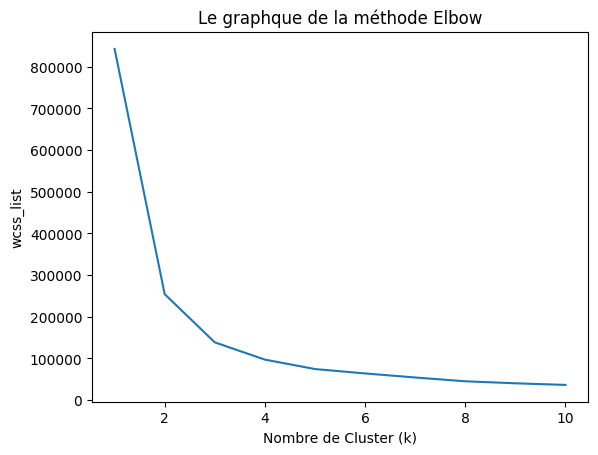

In [46]:
wcss_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('Le graphque de la méthode Elbow')
plt.xlabel('Nombre de Cluster (k)')
plt.ylabel('wcss_list')
plt.show()

In [47]:
X.shape

(200, 4)

In [48]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(X)
y_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4])

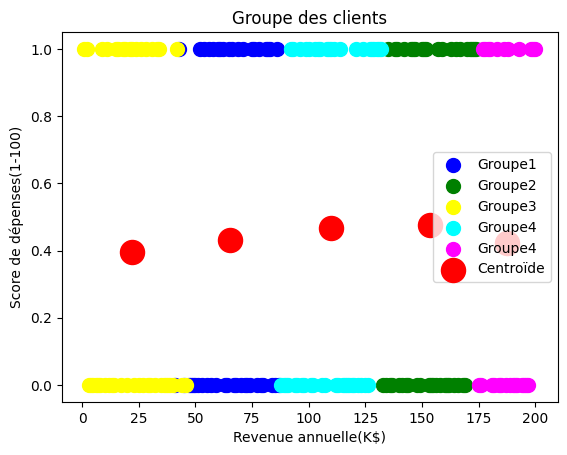

In [49]:
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s =100, c='blue', label = 'Groupe1')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s =100, c='green', label = 'Groupe2')
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s =100, c='yellow', label = 'Groupe3')
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s =100, c='cyan', label = 'Groupe4')
plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], s =100, c='magenta', label = 'Groupe4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c='red', label='Centroïde')
plt.title('Groupe des clients')
plt.xlabel('Revenue annuelle(K$)')
plt.ylabel('Score de dépenses(1-100)')
plt.legend()
plt.show()